In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pycountry
df = pd.read_csv('../web_tool_test.csv')

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2



df['country'] = df.apply(lambda row: row.header.split('/')[1], axis=1)


In [64]:
df['prob_F'] = 2.7182**df['Your_Test_F_log-lh-ratio']/(1+2.7182**df['Your_Test_F_log-lh-ratio'])
df['prob_R'] = 2.7182**df['Your_Test_R_log-lh-ratio']/(1+2.7182**df['Your_Test_R_log-lh-ratio'])
df['probability']= df['prob_R']*df['prob_F']
print(df[df['Your_Test_F_mutations'] == '[]'])
print(df['Your_Test_F_mutations'])

Empty DataFrame
Columns: [header, Your_Test_F_begin, Your_Test_F_end, Your_Test_F_mutations, Your_Test_F_relaxed-mutations, Your_Test_F_free-energy, Your_Test_F_log-lh-ratio, Your_Test_P_begin, Your_Test_P_end, Your_Test_P_mutations, Your_Test_P_relaxed-mutations, Your_Test_P_free-energy, Your_Test_R_begin, Your_Test_R_end, Your_Test_R_mutations, Your_Test_R_relaxed-mutations, Your_Test_R_free-energy, Your_Test_R_log-lh-ratio, country, prob_F, prob_R, probability]
Index: []

[0 rows x 22 columns]
0        [{'position': 0, 'arg': 'A', 'type': 'i'}, {'p...
1        [{'position': 0, 'arg': 'A', 'type': 'i'}, {'p...
2        [{'position': 0, 'arg': 'A', 'type': 's'}, {'p...
3        [{'position': 0, 'arg': 'T', 'type': 'd'}, {'p...
4        [{'position': 1, 'arg': 'C', 'type': 's'}, {'p...
                               ...                        
19627    [{'position': 0, 'arg': 'A', 'type': 'i'}, {'p...
19628    [{'position': 0, 'arg': 'A', 'type': 'i'}, {'p...
19629    [{'position': 0, 

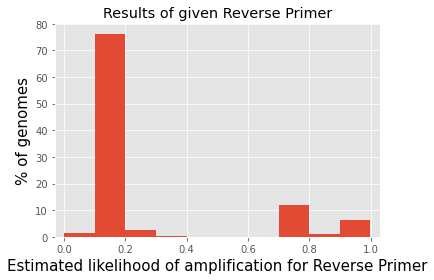

In [65]:
import numpy as np
plt.style.use('ggplot')
plt.hist(df['prob_R'].to_list(), weights=np.ones(len(df['prob_R'].to_list()))*100 / len(df['prob_R'].to_list()))
plt.xlim(-0.03,1.03)
#plt.ylim(0,0.95)
plt.ylabel('% of genomes',size='15', c='black')
plt.xlabel('Estimated likelihood of amplification for Reverse Primer', size='15', c='black')
plt.title('Results of given Reverse Primer')
plt.tight_layout()
plt.savefig('E_germany_results')

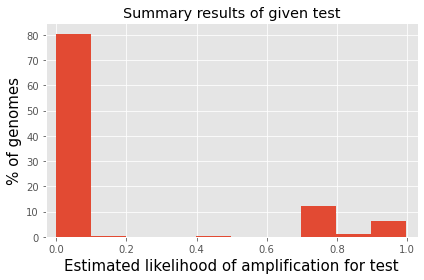

In [66]:
import numpy as np
plt.style.use('ggplot')
plt.hist(df['probability'].to_list(), weights=np.ones(len(df['probability'].to_list()))*100 / len(df['probability'].to_list()))
plt.xlim(-0.03,1.03)
#plt.ylim(0,0.95)
plt.ylabel('% of genomes',size='15', c='black')
plt.xlabel('Estimated likelihood of amplification for test', size='15', c='black')
plt.title('Summary results of given test')
plt.tight_layout()
plt.savefig('E_germany_results')

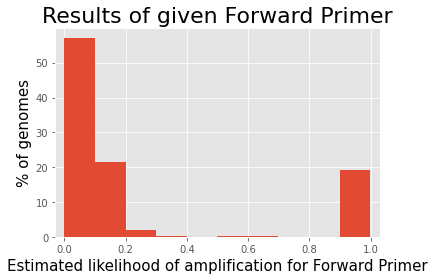

In [67]:
import numpy as np
plt.style.use('ggplot')
plt.hist(df['prob_F'].to_list(), weights=np.ones(len(df['prob_F'].to_list()))*100 / len(df['prob_F'].to_list()))
plt.xlim(-0.03,1.03)
#plt.ylim(0,0.95)
plt.ylabel('% of genomes',size='15', c='black')
plt.xlabel('Estimated likelihood of amplification for Forward Primer',size='15', c='black')
plt.title('Results of given Forward Primer',size='22', c='black')
plt.tight_layout()
plt.savefig('E_germany_results')

                                                  header  Your_Test_F_begin  \
0      >hCoV-19/USA/WA-UW-1684/2020|EPI_ISL_424217|20...              26277   
1      >hCoV-19/USA/WA-UW-1729/2020|EPI_ISL_424220|20...              26284   
2      >hCoV-19/USA/WA-UW-1748/2020|EPI_ISL_424221|20...              26278   
4      >hCoV-19/USA/WA-UW-1745/2020|EPI_ISL_424224|20...              26275   
5      >hCoV-19/USA/WA-UW-1705/2020|EPI_ISL_424226|20...              26255   
...                                                  ...                ...   
19567  >hCoV-19/Wales/PHWC-2B12A/2020|EPI_ISL_432174|...              26275   
19568  >hCoV-19/Wales/PHWC-27FD9/2020|EPI_ISL_432175|...              26276   
19577  >hCoV-19/Wales/PHWC-25357/2020|EPI_ISL_432188|...              26275   
19579  >hCoV-19/Wales/PHWC-2B2BE/2020|EPI_ISL_432191|...              26275   
19580  >hCoV-19/Wales/PHWC-27CD2/2020|EPI_ISL_432192|...              26277   

       Your_Test_F_end                             

In [24]:
import plotly.express as px
print(df)
fig = px.scatter_geo(df, locations="iso_alpha",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['header', 'Your_Test_F_begin', 'Your_Test_F_end', 'Your_Test_F_mutations', 'Your_Test_F_relaxed-mutations', 'Your_Test_F_free-energy', 'Your_Test_F_log-lh-ratio', 'Your_Test_P_begin', 'Your_Test_P_end', 'Your_Test_P_mutations', 'Your_Test_P_relaxed-mutations', 'Your_Test_P_free-energy', 'Your_Test_R_begin', 'Your_Test_R_end', 'Your_Test_R_mutations', 'Your_Test_R_relaxed-mutations', 'Your_Test_R_free-energy', 'Your_Test_R_log-lh-ratio', 'country'] but received: pop